# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

#### Merge the 12 months of sales data by concatenating all the csv files into a pandas dataframe

Note: 

Merger is seamless in this case since the csv files have the same number of columns.
It remains to be seen if the process would yield a similarly sucessful result when the files have a differing number of columns. 


3:30 pm 14/10/2021

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('Sales_Data/*.csv')))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning 

##### Drop Nan 

In [3]:
all_sales_data = df.dropna(how="all")

In [4]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Cleaning all rows with text in Order Date column

In [5]:
temp_df = all_sales_data[all_sales_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
all_sales_data = all_sales_data[all_sales_data['Order Date'].str[0:2] != 'Or']
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert columns to correct type

In [7]:
all_sales_data['Price Each'] = pd.to_numeric(all_sales_data['Price Each']) # Make Integer
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered']) # Make float

##### Create a csv file from the dataframe, since the concat method used above only creates a dataframe within Pandas

In [8]:
with open('all_months_data.csv', 'a') as f:
    all_months_data = all_sales_data.to_csv(f, index=False, line_terminator='\n')

## Augment data with additional columns

#### 1. Add Month Column

In [9]:
all_sales_data['Month'] = all_sales_data['Order Date'].str[0:2]
#all_sales_data['Month'] = all_sales_data['Month'].astype('int32')

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [10]:
all_sales_data['Month'] = all_sales_data['Month'].astype('int32')
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### 2: Add a Cities column

In [11]:
#Create two functions to apply on Pandas series 'Purchase Address'

def city_name(address):
    city = str(address).split(',')[1]
    return city

def state_name(address):
    return address.split(',')[2].split(' ')[1]

city_name(all_sales_data['Purchase Address'].iloc[1])

all_sales_data['City'] = all_sales_data['Purchase Address'].apply(lambda x: f"{city_name(x)} ({state_name(x)})")

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

##### Add a Sales column

In [12]:
all_sales_data['Sales'] = all_sales_data['Price Each'] * all_sales_data['Quantity Ordered']

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [13]:
monthly_sales = all_sales_data.groupby('Month').sum()['Sales']
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [14]:
results = all_sales_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


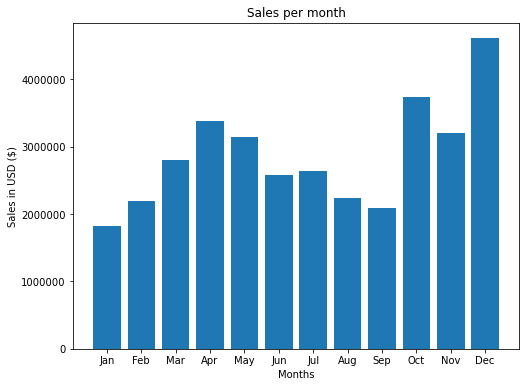

In [15]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.bar(months, results['Sales']) 
plt.ticklabel_format(axis='y', style='plain')
plt.title("Sales per month")
plt.ylabel('Sales in USD ($)')
plt.xlabel("Months")
plt.xticks(months);


Observations:

Sales rose steadily from January to April dipped till June, peaked a little around July but dipped again till September. There was then a spike in October which dipped to levels similar to what they were in May before a strong end of year rally.



#### What city had the highest number of sales

In [16]:
all_sales_data.groupby('City').sum()['Sales']

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

In [17]:
city_results = all_sales_data.groupby('City').sum() #['Quantity Ordered', 'Price Each', 'Sales']
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


##### Plot the graph

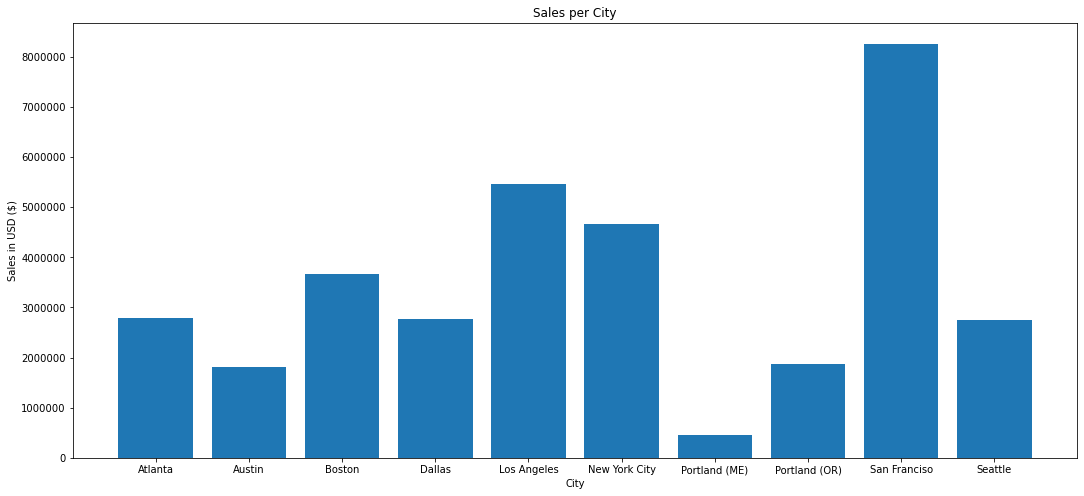

In [18]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 8

cities = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland (ME)', 'Portland (OR)', 'San Franciso', 'Seattle']


plt.bar(cities, city_results['Sales']) 
plt.ticklabel_format(axis='y', style='plain')
plt.title("Sales per City")
plt.ylabel('Sales in USD ($)')
plt.xlabel("City")
plt.xticks(cities);


In [19]:
city_prices = all_sales_data.groupby('City').sum()['Price Each']
city_sales= all_sales_data.groupby('City').sum()['Sales']

from matplotlib import rcParams



rcParams['figure.figsize'] = 10,6
#city_sales.plot()
#city_prices.plot();


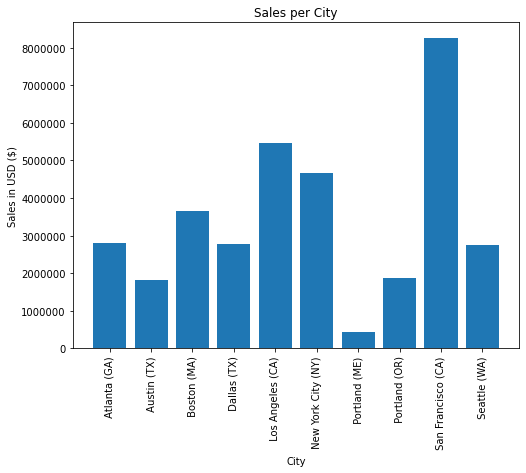

In [20]:
#Another way to plot using a list comprehension to get the x axis ticks

cities = [city for city, df in all_sales_data.groupby('City')]

rcParams['figure.figsize'] = 8, 6
plt.ticklabel_format(axis='y', style='plain')
plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size = 10)
plt.title("Sales per City")
plt.ylabel('Sales in USD ($)')
plt.xlabel("City");


Observations:

The top three cities with respect to sales are San Francisco, Los Angeles and New York. The bottom three are Portland Maine, Portland Oregon and Austin.

Possible reasons for this might be 
The top cities have a higher population density
Also the company may have more stores in those locations 
Better marketing
Higher income per capita ie higher disposable income
Distribution of population in those cities e.g more younger people in city x with a propensity for the products the company sells


Side bar:
I noticed from the line graph I plotted that total sales matched with the curve for total revenue.  My guess is that when total sales matches so well with total revenue, there is very minimal variation in units purchased per customer(~1)


#### Question 3: What time should we display advertising to maximise likelihood of customers buying product?

In [21]:
# Add a Time of Order column

def time(date):
    hour = date.split(' ')[1].split(':')[0] + ':' + '00'
    return hour 

all_sales_data['Time of Order'] = all_sales_data['Order Date'].apply(lambda x: f"{time(x)}")
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Time of Order
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,08:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,09:00


In [22]:
### Alternative method is to convert the Order Date column into datetime format

#all_sales_data['Order Date'] = pd.to_datetime(all_sales_data['Order Date'])

#all_sales_data['Hour'] = all_sales_data['Order Date'].dt.hour
#all_sales_data['Minute'] = all_sales_data['Order Date'].dt.minute

In [23]:
time_results = all_sales_data.groupby('Time of Order').count()['Sales'] 
time_results


Time of Order
00:00     3910
01:00     2350
02:00     1243
03:00      831
04:00      854
05:00     1321
06:00     2482
07:00     4011
08:00     6256
09:00     8748
10:00    10944
11:00    12411
12:00    12587
13:00    12129
14:00    10984
15:00    10175
16:00    10384
17:00    10899
18:00    12280
19:00    12905
20:00    12228
21:00    10921
22:00     8822
23:00     6275
Name: Sales, dtype: int64

##### Plot the graph

C:\Users\KAIZEN\AppData\Local\Temp/ipykernel_13308/904599219.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time_results, 'ro', color='b', linestyle='-')


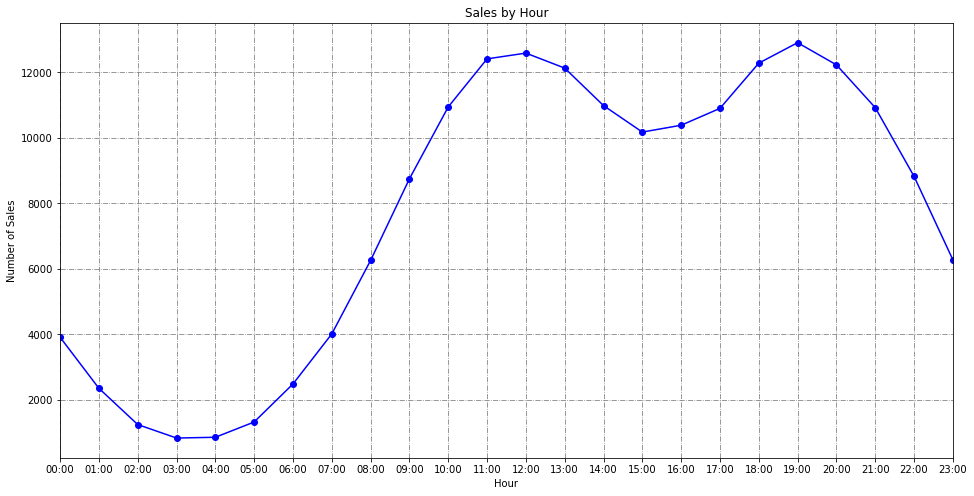

In [24]:
times = [time for time, df in all_sales_data.groupby('Time of Order')]

rcParams['figure.figsize'] = 16, 8
plt.plot(time_results, 'ro', color='b', linestyle='-')
plt.grid(True, color = 'grey', linestyle= '-.')

#Supported values for linetstyle'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

plt.xlim('00:00', '23:00')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(times)
plt.title("Sales by Hour")
plt.ylabel('Number of Sales')
plt.xlabel("Hour");


##### Observation:

Peak time of sales occurred at 12 noon (more generally between 11 am and 1 pm) and 7 pm (generally between 6 and 8 pm). It does make sense as this would tally with people's free time during say lunch periods and close from work in the evenings.


Side bar:
Keith advises that ideal time of ads should be just before 11 am and just before 7 pm since those are the periods of the day when customers are most likely to purchase.

#### Question 4: What products are most often sold together

In [25]:
df = all_sales_data[all_sales_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


C:\Users\KAIZEN\AppData\Local\Temp/ipykernel_13308/3268691321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()
customer_count = 0

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
    
    
for key, value in count.most_common(10):
        
    customer_count += value
    print(key, value)
    
    
    
customer_count    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


4189

Side bar:

By changing the second argument of the combinations function from 2 through 5, 
I obtained the number of customers purchasing each number of items. 


7910 people bought at least 2 items, 
418 people bought at least 3 items, 
22 people bought at least 4 items, 
1 person bought 5 items



#### Question 5: What product sold the most? Why do you think it sold the most?

In [27]:
product_group = all_sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

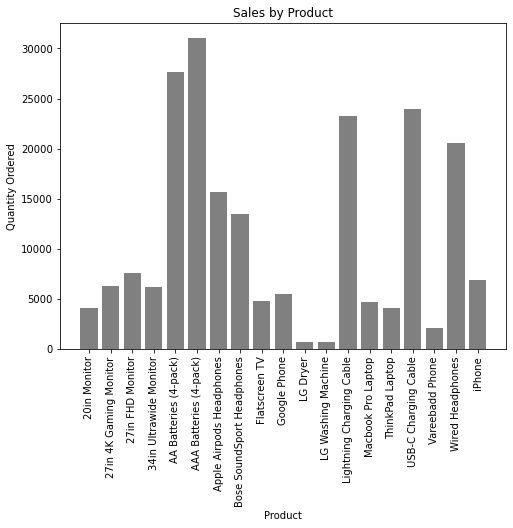

In [28]:
keys = [product for product, df in product_group]
rcParams['figure.figsize'] = 8, 6

plt.bar(keys, quantity_ordered, color='grey')
plt.xticks(keys, rotation='vertical', size=10)
plt.title("Sales by Product")
plt.ylabel('Quantity Ordered')
plt.xlabel("Product")
plt.show()

C:\Users\KAIZEN\AppData\Local\Temp/ipykernel_13308/34433517.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
C:\Users\KAIZEN\AppData\Local\Temp/ipykernel_13308/34433517.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


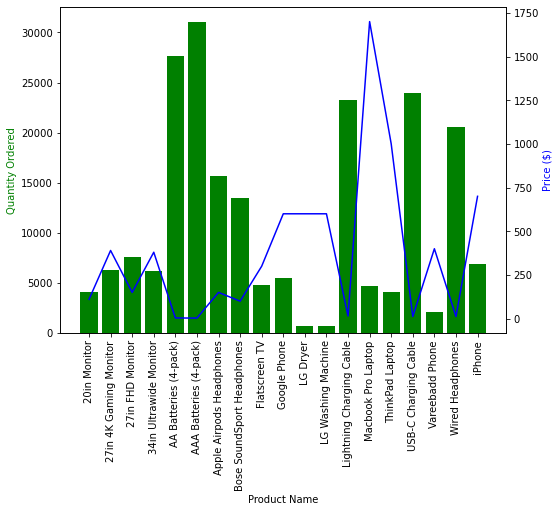

In [29]:
prices = all_sales_data.groupby('Product').mean()['Price Each']

rcParams['figure.figsize'] = 8, 6

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()